### [Imports](#imports)  
### [Chargement du dataframe](#loading)    
### [Informations sur le dataframe](#infodata)  
### [Valeurs manquantes et valeurs dupliquées du dataframe](#missing)  
### [Analyse exploratoire](#exploratory)  
### [Échantillonnage](#sample)  
### [Wordcloud](#wordcloud)  

# <center><a id='imports'>Imports</a></center>

In [1]:
# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

# Seaborn
import seaborn as sns

# Plotly
import plotly.express as px
from plotly.offline import init_notebook_mode

# Wordcloud
from wordcloud import WordCloud

# Functions notebook
from functions.functions import *

# <center><a id='loading'>Chargement du dataframe</a></center>

In [2]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", sep=",", encoding="latin-1", header=None)

In [3]:
data = data.rename(columns={0 : "target", 1 : "id", 2 : "date", 3 : "is_querry", 4 : "user_name", 5 : "tweet"})

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Chargement du dataframe training.1600000.processed.noemoticon.csv.<br>
Les colonnes sont renommées, car elles allait de 0 à 5.
</div>

# <center><a id='infodata'>Informations du dataframe</a></center>

In [4]:
data.sample(20)

,target,id,date,is_querry,user_name,tweet
617341,0,2227020497,Thu Jun 18 12:40:38 PDT 2009,NO_QUERY,ariellec,KFC flavors their grilled chicken with beef? i...
930139,4,1760246699,Sun May 10 21:01:45 PDT 2009,NO_QUERY,ShawnStJames,We absolutely love you Joan! We couldnt be mor...
994217,4,1835515240,Mon May 18 06:10:03 PDT 2009,NO_QUERY,mrpbunny,"is happy because his yeast is happy, and if hi..."
1185654,4,1982818862,Sun May 31 11:57:57 PDT 2009,NO_QUERY,YRJewelryGal,@kdpartak probably 15! Ha! at petstore now ove...
1167516,4,1980062284,Sun May 31 05:33:01 PDT 2009,NO_QUERY,smacula,@LauraKelly28 sounds a plan
419397,0,2061980221,Sat Jun 06 22:03:02 PDT 2009,NO_QUERY,Lax02,Cant sleep i wish i would have just stayed up...
1215536,4,1989550567,Mon Jun 01 01:57:42 PDT 2009,NO_QUERY,eleciously_ele,"Aft abg zul repaired d air con in my office, d..."
643584,0,2235809746,Fri Jun 19 02:07:45 PDT 2009,NO_QUERY,princessv82,Is in work
824720,4,1556313369,Sat Apr 18 22:22:05 PDT 2009,NO_QUERY,YoYebba,just got home from seeing Fasterx2 and TFT! g...
847217,4,1564542583,Mon Apr 20 03:58:33 PDT 2009,NO_QUERY,VickiHinman,@Ericatwitts &quot;They R worried...&quot; Th...


In [5]:
data.shape

(1600000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   target     1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   is_querry  1600000 non-null  object
 4   user_name  1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
data.dtypes.value_counts()

object    4
int64     2
dtype: int64

In [8]:
data.nunique()

target             2
id           1598315
date          774363
is_querry          1
user_name     659775
tweet        1581466
dtype: int64

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
La taille du jeu de données est de 1 600 000 lignes et de 6 colonnes.<br>
Il y a 2 colonnes de types INT64 et 4 de types OBJECT.
</div>

# <center><a id='missing'>Valeurs manquantes et valeurs dupliquées du dataframe</a></center>

In [9]:
data.isnull().sum()

target       0
id           0
date         0
is_querry    0
user_name    0
tweet        0
dtype: int64

In [10]:
data.duplicated().sum()

0

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Il n'y a aucunes valeurs manquantes et valeurs dupliquées dans ce dataset.
</div>

# <center><a id='exploratory'>Analyse exploratoire</a></center>

In [11]:
data["tweet"].apply(lambda i : len(i))

0          115
1          111
2           89
3           47
4          111
          ... 
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: tweet, Length: 1600000, dtype: int64

In [12]:
len_text = data["tweet"].str.len()
data["len_text"] = len_text

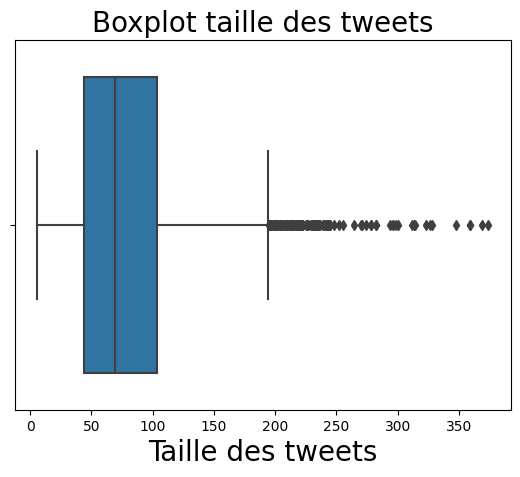

In [13]:
boxplot_chart_len_tweet(len_text)

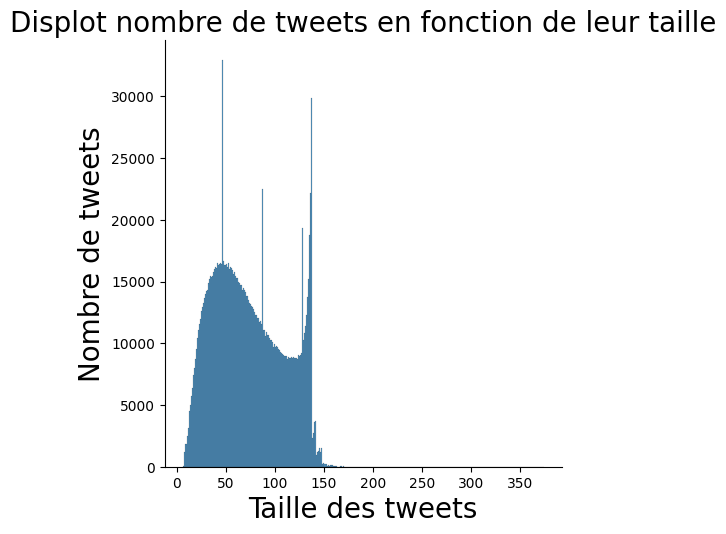

In [14]:
distplot_chart_len_tweet(len_text)

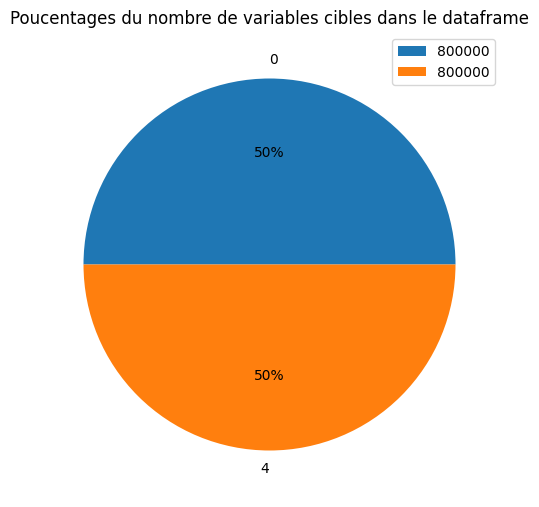

In [15]:
pie_chart_target(data["target"])

In [16]:
data['target'].replace(4,1, inplace=True)

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Le graphique boxplot indique que la longueur des tweets se situent principalement entre 40 et 110 caractères.<br>
Le graphique distplot montre que la longueur des tweets croit de 10 a 50 caractères, décroit de 50 à 130 caractères et croit de nouveau de 130 à 150.<br>
Les sentiments "Positif" et "Négatif" (variables cibles du dataframe) sont équilibrés.<br>
La cible dont la valeur est égale a 4 est remplacé par "1" pour que ce soit binaire.
</div>

# <center><a id='sample'>Échantillonnage</a></center>

In [17]:
data_0 = data[data["target"] == 0][:2000].sample(frac=0.50, replace=False, random_state=1)
data_1 = data[data["target"] == 1][:2000].sample(frac=0.50, replace=False, random_state=1)

data = pd.concat([data_0, data_1], join="inner")

In [18]:
data

,target,id,date,is_querry,user_name,tweet,len_text
674,0,1467982281,Mon Apr 06 23:06:33 PDT 2009,NO_QUERY,A_Gael,@katebornstein which is pretty anti memorial t...,135
1699,0,1468212381,Tue Apr 07 00:19:42 PDT 2009,NO_QUERY,abbeeey,why does stik-o have to be chocolate?!,39
1282,0,1468121819,Mon Apr 06 23:50:04 PDT 2009,NO_QUERY,CocoaBiege,ordered a pita...it NEVR came! why they say th...,113
1315,0,1468129384,Mon Apr 06 23:52:32 PDT 2009,NO_QUERY,jadeheart,"@itsangie i canceled it, with plane tickets, h...",138
1210,0,1468108049,Mon Apr 06 23:45:26 PDT 2009,NO_QUERY,xfxf,@offbytwo seeing a doctor i hope?,34
...,...,...,...,...,...,...,...
800103,1,1467841257,Mon Apr 06 22:27:45 PDT 2009,NO_QUERY,Idolfanaddict,Just seen the preview for the movie &quot;Obse...,145
800009,1,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,67
801929,1,1468148437,Mon Apr 06 23:59:00 PDT 2009,NO_QUERY,Paljanpeel,Another bright sunny day! - Island must have d...,122
800543,1,1467918504,Mon Apr 06 22:48:31 PDT 2009,NO_QUERY,ayakyl,agghhhh looosing my mind!!!!,29


In [19]:
data = data.reset_index()
data = data.drop(["index"], axis=1)

In [20]:
data

,target,id,date,is_querry,user_name,tweet,len_text
0,0,1467982281,Mon Apr 06 23:06:33 PDT 2009,NO_QUERY,A_Gael,@katebornstein which is pretty anti memorial t...,135
1,0,1468212381,Tue Apr 07 00:19:42 PDT 2009,NO_QUERY,abbeeey,why does stik-o have to be chocolate?!,39
2,0,1468121819,Mon Apr 06 23:50:04 PDT 2009,NO_QUERY,CocoaBiege,ordered a pita...it NEVR came! why they say th...,113
3,0,1468129384,Mon Apr 06 23:52:32 PDT 2009,NO_QUERY,jadeheart,"@itsangie i canceled it, with plane tickets, h...",138
4,0,1468108049,Mon Apr 06 23:45:26 PDT 2009,NO_QUERY,xfxf,@offbytwo seeing a doctor i hope?,34
...,...,...,...,...,...,...,...
1995,1,1467841257,Mon Apr 06 22:27:45 PDT 2009,NO_QUERY,Idolfanaddict,Just seen the preview for the movie &quot;Obse...,145
1996,1,1467822496,Mon Apr 06 22:22:49 PDT 2009,NO_QUERY,SherylBreuker,@e4VoIP I RESPONDED Stupid cat is helping me ...,67
1997,1,1468148437,Mon Apr 06 23:59:00 PDT 2009,NO_QUERY,Paljanpeel,Another bright sunny day! - Island must have d...,122
1998,1,1467918504,Mon Apr 06 22:48:31 PDT 2009,NO_QUERY,ayakyl,agghhhh looosing my mind!!!!,29


<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Dans le but de faire tourner les modèles et les algorithmes, le jeu de données est échantillonné.<br>
1000 lignes contiennent des sentiments positifs et 1000 de sentiments négatifs.<br>
</div>

# <center><a id='wordcloud'>Wordcloud</a></center>

In [21]:
wordcloud = WordCloud(background_color='white', stopwords=[], max_words=50).generate(" ".join(data['tweet']))

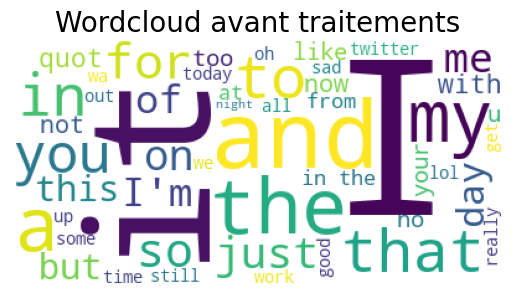

In [22]:
wordcloud_before_traitements(wordcloud, "Wordcloud avant traitements")

In [23]:
data.to_csv("csv/data.csv", index=False) 

<div style="background-color : lightgreen; color: black; padding : 5px; border-radius: 5px">
Le graphique Wordcloud affiche les mots les plus présents dans le dataset avant que des traitements de NLP soit effectués.<br>
Le dataframe est exporté au format "CSV" pour pouvoir être utilisés dans d'autre notebook.
</div>